# Интерполяция

In [95]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from celluloid import Camera
import matplotlib.animation

plt.rcParams["animation.html"] = "jshtml"
from matplotlib.animation import FuncAnimation

%matplotlib inline

sns.set(style="darkgrid")

In [96]:
def Chebyshev(a, b, n):
    rez = []
    for k in range(0, n - 1):
        rez.append((a + b) / 2 + (b - a) / 2 * math.cos(((2*k + 1) * math.pi) / (2*(n - 1))))
    
    return rez

## Ньютон

In [97]:
def NewtonCoefs(x,y):
    n = len(x)
    coefs = np.copy(y)

    for index in range(1, n):
        fs = np.ones(n)
        for f in range(index, n):
            num = coefs[f] - coefs[f-1]
            den = x[f] - x[f-index]
            fs[f] = num/den

        for i in range(index, n):
            coefs[i] = fs[i]
    
    return coefs

In [98]:
def NewtonCompact(coefs, x, p):
    n = len(x) - 1
    products = coefs[n]
    for index in range(n,0,-1):
        products = (p - x[index-1])*products + coefs[index-1]
    
    return products

In [99]:
def NewtonPrintGraph(x, y, p, pol):
    plt.figure(figsize = (20,8), dpi = 80)
    plt.plot(p, pol, color = "blue")

In [100]:
def Newton(a, b, n):
    x = Chebyshev(a, b, n)
    y = np.sin(10*x)
    
    c = NewtonCoefs(x, y)
    p = np.linspace(np.min(x), np.max(x))
    pol = NewtonCompact(c, x, p)

    NewtonPrintGraph(x, y, p, pol)

## Лаграндж

In [101]:
def LagrangeCompact(x, y, p):
    result = 0
    for i in range (len(x)):
        coef = 1
        for j in range (0, len(x)):
            if (i != j):
                coef *= (p-x[j])/(x[i]-x[j]) 
        result += y[i]*coef
        
    return result

In [102]:
def LagrangePrintGraph(x, y, p, pol):
    plt.figure(figsize = (20,8), dpi = 80)
    plt.plot(p, pol, color = 'green')

In [103]:
def Lagrange(a, b, n):
    x = Chebyshev(a, b, n)
    y = np.sin(10*x)

    p = np.linspace(np.min(x), np.max(x), num = n)
    pol = LagrangeCompact(x,y,p)

    LagrangePrintGraph(x,y,p,pol)

## Кубический сплайн

In [104]:
class SplineTuple:
    def __init__(self, a, b, c, d, x):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.x = x

In [105]:
def SplineBuild(x, y, n):
    splines = [SplineTuple(0, 0, 0, 0, 0) for _ in range(0, n)]
    for i in range(0, n):
        splines[i].x = x[i]
        splines[i].a = y[i]
    
    splines[0].c = splines[n - 1].c = 0.0
    
    alpha = [0.0 for _ in range(0, n - 1)]
    beta  = [0.0 for _ in range(0, n - 1)]
 
    for i in range(1, n - 1):
        hi  = x[i] - x[i - 1]
        hi1 = x[i + 1] - x[i]
        A   = hi
        C   = 2.0 * (hi + hi1)
        B   = hi1
        F   = 6.0 * ((y[i + 1] - y[i]) / hi1 - (y[i] - y[i - 1]) / hi)
        z   = (A * alpha[i - 1] + C)
        alpha[i] = -B / z
        beta[i] = (F - A * beta[i - 1]) / z
        
    for i in range(n - 2, 0, -1):
        splines[i].c = alpha[i] * splines[i + 1].c + beta[i]
    
    for i in range(n - 1, 0, -1):
        hi = x[i] - x[i - 1]
        splines[i].d = (splines[i].c - splines[i - 1].c) / hi
        splines[i].b = hi * (2.0 * splines[i].c + splines[i - 1].c) / 6.0 + (y[i] - y[i - 1]) / hi
        
    return splines

In [106]:
def SplinePrintGraph(x, y, spline):
    plt.figure(figsize = (20,8), dpi = 80)
    for i in range(1, len(x)):
        xt = np.linspace(x[i - 1], x[i], n)
        s = []
        for j in range(0, len(xt)):
            s.append((spline[i].a + spline[i].b * (xt[j] - x[i]) + spline[i].c / 2 * (xt[j] - x[i])**2 + spline[i].d / 6 * (xt[j] - x[i])**3))
        plt.plot(xt, s, color = 'purple')

In [107]:
def Spline(a, b, n):
    x = Chebyshev(a, b, n)
    y = np.sin(10*x)

    spline = SplineBuild(x, y, len(x))
    SplinePrintGraph(x, y, spline)

## Main

In [108]:
a = 0
b = 2*math.pi
n = 10

Ньютон


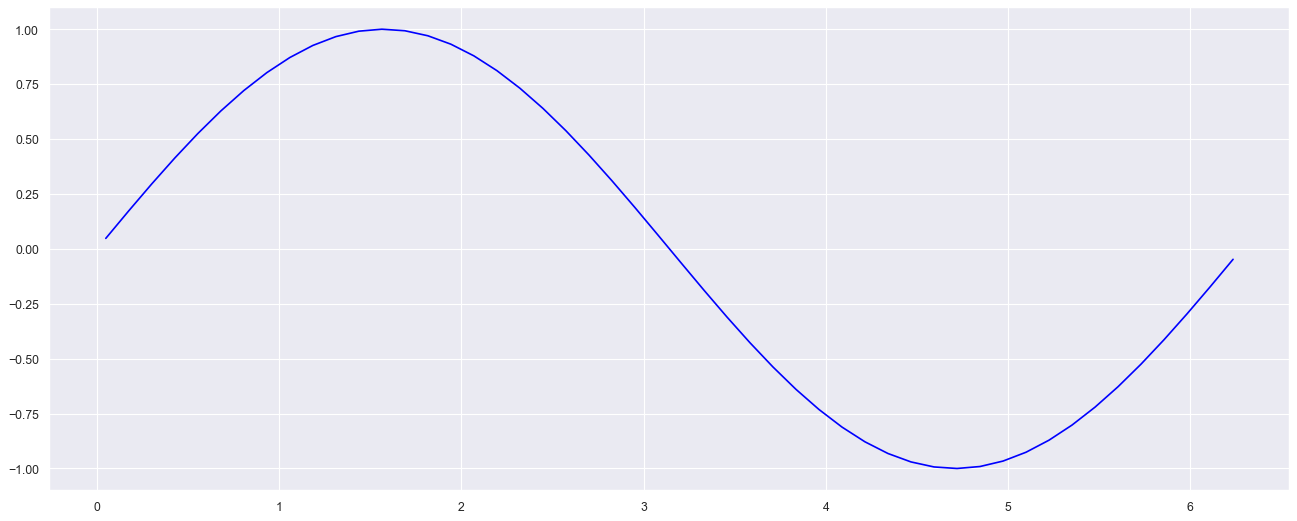

In [109]:
print('Ньютон')
Newton(a, b, n)

Лагранж


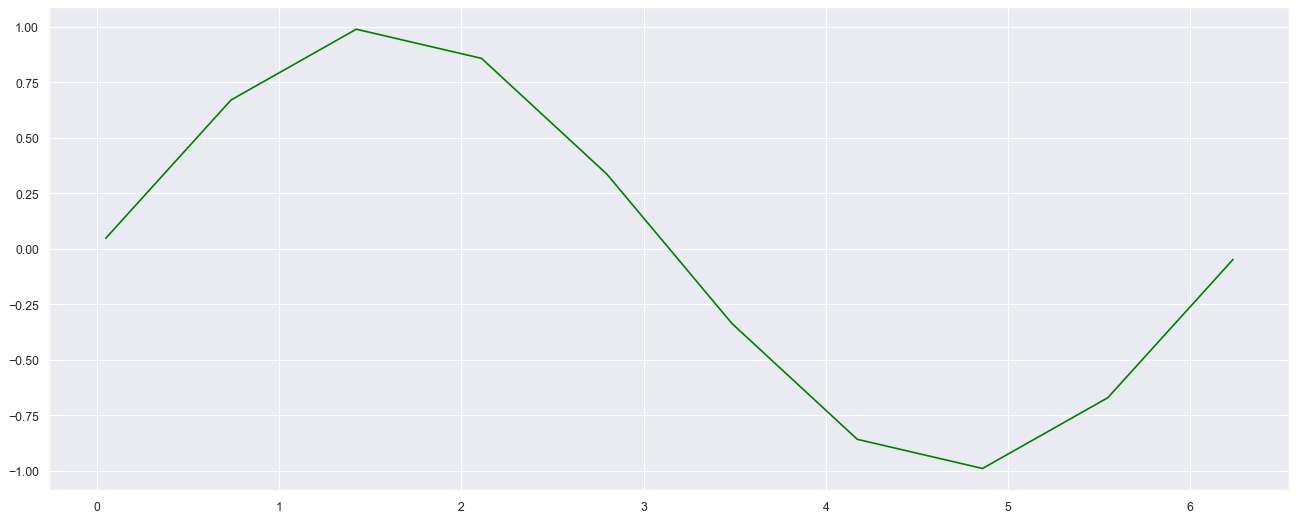

In [110]:
print('Лагранж')
Lagrange(a, b, n)

Сплайн


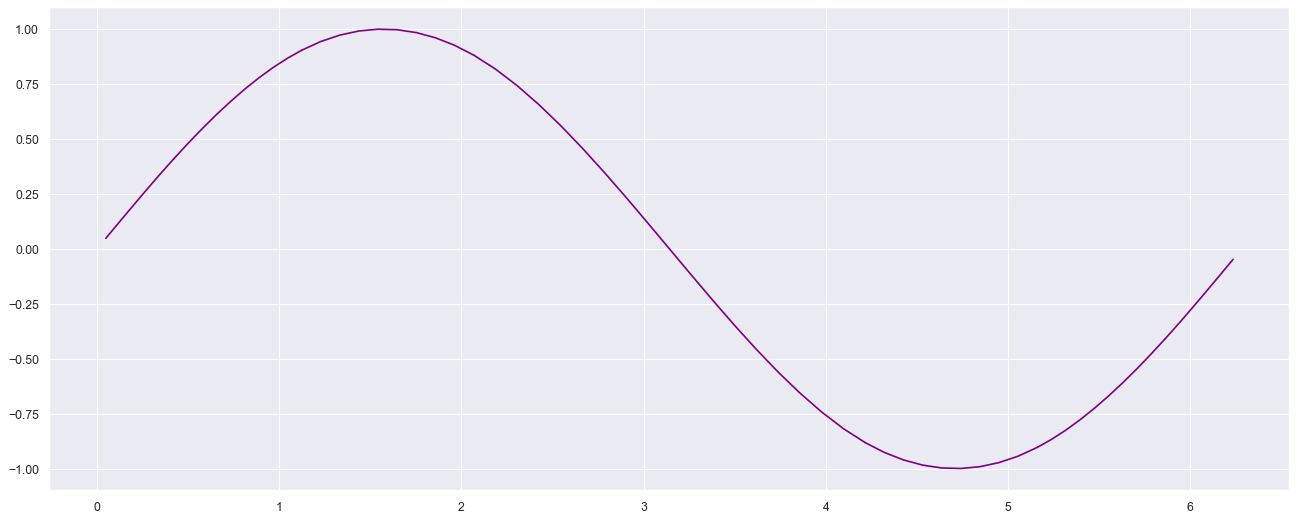

In [111]:
print('Сплайн')
Spline(a, b, n)